In [1]:
#!/usr/bin/env python3
# Download the 56 zip files in Images_png in batches
import urllib.request

# URLs for the zip files
links = [
    'https://nihcc.box.com/shared/static/vfk49d74nhbxq3nqjg0900w5nvkorp5c.gz',
    'https://nihcc.box.com/shared/static/i28rlmbvmfjbl8p2n3ril0pptcmcu9d1.gz',
    'https://nihcc.box.com/shared/static/f1t00wrtdk94satdfb9olcolqx20z2jp.gz',
	'https://nihcc.box.com/shared/static/0aowwzs5lhjrceb3qp67ahp0rd1l1etg.gz',
    'https://nihcc.box.com/shared/static/v5e3goj22zr6h8tzualxfsqlqaygfbsn.gz',
	'https://nihcc.box.com/shared/static/asi7ikud9jwnkrnkj99jnpfkjdes7l6l.gz',
	'https://nihcc.box.com/shared/static/jn1b4mw4n6lnh74ovmcjb8y48h8xj07n.gz',
    'https://nihcc.box.com/shared/static/tvpxmn7qyrgl0w8wfh9kqfjskv6nmm1j.gz',
	'https://nihcc.box.com/shared/static/upyy3ml7qdumlgk2rfcvlb9k6gvqq2pj.gz',
	'https://nihcc.box.com/shared/static/l6nilvfa9cg3s28tqv1qc1olm3gnz54p.gz',
	'https://nihcc.box.com/shared/static/hhq8fkdgvcari67vfhs7ppg2w6ni4jze.gz',
	'https://nihcc.box.com/shared/static/ioqwiy20ihqwyr8pf4c24eazhh281pbu.gz'
]

for idx, link in enumerate(links):
    fn = 'images_%02d.tar.gz' % (idx+1)
    print('downloading'+fn+'...')
    urllib.request.urlretrieve(link, fn)  # download the zip file

print("Download complete. Please check the checksums")

downloadingimages_01.tar.gz...
downloadingimages_02.tar.gz...
downloadingimages_03.tar.gz...
downloadingimages_04.tar.gz...
downloadingimages_05.tar.gz...
downloadingimages_06.tar.gz...
downloadingimages_07.tar.gz...
downloadingimages_08.tar.gz...
downloadingimages_09.tar.gz...
downloadingimages_10.tar.gz...
downloadingimages_11.tar.gz...
downloadingimages_12.tar.gz...
Download complete. Please check the checksums


In [1]:
from pydicom import dcmread
#from pydicom.data import get_testdata_files

# 取得 Pydicom 附帶的 DICOM 測試影像路徑
#filename = get_testdata_files('dicom_0000000_000.dcm')[0]

# 讀取 DICOM 檔案
ds = dcmread('dicom_00000001_000.dcm')
print(ds.shape)
# 列出所有後設資料（metadata）
#print(ds)

AttributeError: 'FileDataset' object has no attribute 'shape'

In [36]:
# 輸出 Patient Name 資料
print(ds.PatientName)
# 輸出 Patient Name 資料
#print(ds[0x10,0x10].value)

# 輸出 Patient Name 資料
#print(ds[0x100010].value)

AttributeError: 'FileDataset' object has no attribute 'PatientName'

In [37]:
print(ds[0x100010].value)

KeyError: (0010, 0010)

In [38]:
# 更改 Patient Name 資料
ds.PatientName = "Tom Huang"



In [39]:
print(ds)

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 204
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.3.6.1.4.1.11129.5.5.153751009835107614666834563294684339746480
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.8.498.1
(0002, 0013) Implementation Version Name         SH: 'PYDICOM 1.2.0'
-------------------------------------------------
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.3.6.1.4.1.11129.5.5.153751009835107614666834563294684339746480
(0008, 0060) Modality                            CS: 'DX'
(0008, 1030) Study Description                   LO: 'Cardiomegaly'
(0010, 0010) Pati

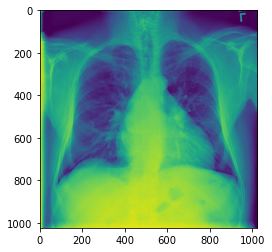

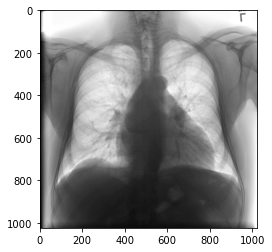

Image Size: 1024 x 1024


In [3]:
import matplotlib.pyplot as plt

# 以 matplotlib 繪製影像
plt.imshow(ds.pixel_array)
plt.show()
plt.imshow(ds.pixel_array,cmap=plt.cm.binary)
plt.show()
print("Image Size: {} x {}".format(ds.Rows, ds.Columns))

In [56]:
# 縮小影像10 means 1/10
data_downsampling = ds.pixel_array[::10, ::10]

# 將縮小的影像放入原來的 DICOM 資料集
ds.PixelData = data_downsampling.tobytes()

# 更新影像大小
ds.Rows, ds.Columns = data_downsampling.shape

In [57]:
# 另存 DICOM 檔案
#ds.save_as("de-identification.dcm")

# 影像大小（DICOM 後設資料）
print("Image Size: {} x {}".format(ds.Rows, ds.Columns))

Image Size: 1 x 1


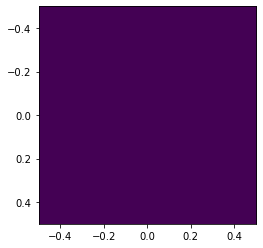

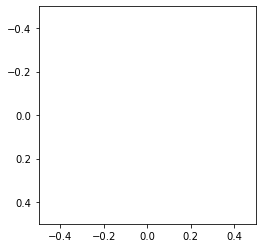

In [58]:
plt.imshow(ds.pixel_array)
plt.show()
plt.imshow(ds.pixel_array,cmap=plt.cm.binary)
plt.show()

In [30]:
# Pixel Spacing（DICOM 後設資料）
print("Pixel Spacing: {}".format(ds.PixelSpacing))

AttributeError: 'FileDataset' object has no attribute 'PixelSpacing'

In [31]:
# Slice Thickness（DICOM 後設資料）
print("Slice Thickness: {}".format(ds.SliceThickness))

AttributeError: 'FileDataset' object has no attribute 'SliceThickness'

In [16]:
# 像素值範圍（DICOM 後設資料）
print("Pixel Value: {} ~ {}".format(ds.SmallestImagePixelValue, ds.LargestImagePixelValue))

AttributeError: 'FileDataset' object has no attribute 'SmallestImagePixelValue'

In [17]:
# 影像大小（Pydicom 解析後資料）
print(ds.pixel_array.shape)
# 像素資料類型（Pydicom 解析後資料）
print(ds.pixel_array.dtype)

(256, 256)
uint8


In [18]:
# 繪製像素值分佈圖
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.distplot(ds.pixel_array.flatten())
plt.show()

ModuleNotFoundError: No module named 'seaborn'

In [19]:
# 出現頻率最高的 16 個像素值
import pandas as pd
top16 = pd.Series(ds.pixel_array.flatten()).value_counts().index[:16]
sns.countplot(y = ds.pixel_array.flatten(), order = top16,
              color = "g", orient = "h")
plt.show()

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# 另存 DICOM 檔案
ds.save_as("de-identification.dcm")